## **Modelling Enhancements**

**Feature Selection**

- Perform Recursive Feature Elimination (RFE) or LASSO regression to identify the most important features

In [1]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import os
import sys
from importlib import reload

sys.path.append(os.path.abspath(os.path.join('..', 'scripts')))

In [14]:
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import MinMaxScaler, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, classification_report

In [2]:
rfm_df = pd.read_csv('../data/rfm_data.csv')

In [4]:
df_normalized = pd.read_csv('../data/extracted_features.csv')

In [5]:
# Transform Risk_Label into binary representation
risk_label_conversion = {'Good': 1, 'Bad': 0}
rfm_df['Risk_Label'] = rfm_df['Risk_Label'].replace(risk_label_conversion)

# Select relevant columns for RFM data
rfm_selected_data = rfm_df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Risk_Label']]

# Remove duplicate rows based on CustomerId
unique_customers = df_normalized.drop_duplicates(subset='CustomerId', keep='first')

# Combine normalized data with RFM data
merged_features = pd.merge(unique_customers, rfm_selected_data, on='CustomerId', how='left')

# Set CustomerId as the index
merged_features.set_index('CustomerId', inplace=True)

# Eliminate unnecessary columns
merged_features.drop(['TransactionStartTime'], axis=1, inplace=True)

# Define the target variable
target_variable = rfm_df['Risk_Label']

# Preview the processed features
merged_features.head()


C:\Users\Hello\AppData\Local\Temp\ipykernel_8708\3945958876.py:3: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  rfm_df['Risk_Label'] = rfm_df['Risk_Label'].replace(risk_label_conversion)


,Unnamed: 0.1,index,Unnamed: 0,TransactionId,Amount,PricingStrategy,FraudResult,Total_Transactions,Average_Transaction,Transaction_Volume,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Risk_Label
CustomerId,,,,,,,,,,,,,,,,,,,,,
CustomerId_4406,0,0.0,0.0,TransactionId_76871,1000.0,0.5,0.0,0.557522,0.047184,0.028851,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,TransactionId_76871,1000.0,0.5,0.0,0.557522,0.047184,0.028851,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,TransactionId_76871,1000.0,0.5,0.0,0.557522,0.047184,0.028851,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,TransactionId_76871,1000.0,0.5,0.0,0.557522,0.047184,0.028851,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,TransactionId_76871,1000.0,0.5,0.0,0.557522,0.047184,0.028851,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1


In [7]:
# Transform Risk_Label into binary representation
risk_label_conversion = {'Good': 1, 'Bad': 0}
rfm_df['Risk_Label'] = rfm_df['Risk_Label'].replace(risk_label_conversion)

# Select relevant columns for RFM data
rfm_selected_data = rfm_df[['CustomerId', 'Recency', 'Frequency', 'Monetary', 'Risk_Label']]

# Remove duplicate rows based on CustomerId
unique_customers = df_normalized.drop_duplicates(subset='CustomerId', keep='first')

# Check for non-numeric columns and drop them, if any
non_numeric_columns = unique_customers.select_dtypes(include=['object']).columns
unique_customers = unique_customers.drop(columns=non_numeric_columns.difference(['CustomerId']))

# Combine normalized data with RFM data
merged_features = pd.merge(unique_customers, rfm_selected_data, on='CustomerId', how='left')

# Set CustomerId as the index
merged_features.set_index('CustomerId', inplace=True)

# Eliminate unnecessary columns
merged_features.drop(['TransactionStartTime'], axis=1, inplace=True, errors='ignore')

# Define the target variable
target_variable = rfm_df['Risk_Label']

# Preview the processed features
merged_features.head()


,Unnamed: 0.1,index,Unnamed: 0,Amount,PricingStrategy,FraudResult,Total_Transactions,Average_Transaction,Transaction_Volume,StdDev_Transaction,...,ProductCategory_transport,ProductCategory_tv,ProductCategory_utility_bill,ChannelId_ChannelId_2,ChannelId_ChannelId_3,ChannelId_ChannelId_5,Recency,Frequency,Monetary,Risk_Label
CustomerId,,,,,,,,,,,,,,,,,,,,,
CustomerId_4406,0,0.0,0.0,1000.0,0.5,0.0,0.557522,0.047184,0.028851,0.000919,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,1000.0,0.5,0.0,0.557522,0.047184,0.028851,0.000919,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,1000.0,0.5,0.0,0.557522,0.047184,0.028851,0.000919,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,1000.0,0.5,0.0,0.557522,0.047184,0.028851,0.000919,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1
CustomerId_4406,0,0.0,0.0,1000.0,0.5,0.0,0.557522,0.047184,0.028851,0.000919,...,0.0,0.0,0.0,0.0,1.0,0.0,2104,119,109921.75,1


In [9]:
merged_features.to_csv('../data/extracted_features.csv')

In [8]:
import pandas as pd

# Calculate the correlation matrix
correlation_matrix = merged_features.corr()

# Get the correlation values for the target column
corr_with_target = correlation_matrix['Risk_Label'].abs()


# Select features that have correlation above the threshold (excluding the target column itself)
selected_features = corr_with_target[corr_with_target > 0.1].index.tolist()
selected_features.remove('Risk_Label')  # Exclude the target column itself

# Return the DataFrame with only the selected features
features = merged_features[selected_features]

In [10]:
corr_with_target.sort_values(ascending=False).reset_index(name='Correlation with Risk_Label')

,index,Correlation with Risk_Label
0,Risk_Label,1.000000
1,Total_Debits,0.459751
2,Recency,0.328846
3,Net_Amount,0.252494
4,Total_Transactions,0.252494
5,Monetary,0.252494
6,PricingStrategy,0.244921
7,ChannelId_ChannelId_2,0.235639
8,ChannelId_ChannelId_3,0.204666
9,Unnamed: 0,0.202927


In [12]:
merged_features.columns

Index(['Unnamed: 0.1', 'index', 'Unnamed: 0', 'Amount', 'PricingStrategy',
       'FraudResult', 'Total_Transactions', 'Average_Transaction',
       'Transaction_Volume', 'StdDev_Transaction', 'Net_Amount',
       'Total_Debits', 'Total_Credits', 'Debit_to_Credit_Ratio',
       'Hour_of_Transaction', 'Day_of_Transaction', 'Month_of_Transaction',
       'Year_of_Transaction', 'ProductCategory_data_bundles',
       'ProductCategory_financial_services', 'ProductCategory_movies',
       'ProductCategory_other', 'ProductCategory_ticket',
       'ProductCategory_transport', 'ProductCategory_tv',
       'ProductCategory_utility_bill', 'ChannelId_ChannelId_2',
       'ChannelId_ChannelId_3', 'ChannelId_ChannelId_5', 'Recency',
       'Frequency', 'Monetary', 'Risk_Label'],
      dtype='object')

In [13]:
# Separate target and feature variables
X = merged_features
y = target_variable

In [15]:
# Assume 'features' is your features DataFrame and 'target' is your binary target variable
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=42)

In [16]:
from imblearn.over_sampling import SMOTE

# Initialize SMOTE
smote = SMOTE(random_state=42)

# Fit and resample the training data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

In [17]:
# Initialize classifiers
classifiers = {
    'Logistic Regression': LogisticRegression(),
    'Decision Tree Classifier': DecisionTreeClassifier(),
    'Random Forest Classifier': RandomForestClassifier(),
    'Gradient Boosting Classifier': GradientBoostingClassifier()
}

# Specify hyperparameter search spaces
hyperparameter_options = {
    'Logistic Regression': {'model__C': [0.01, 0.1, 1, 10, 100]},
    'Decision Tree Classifier': {'model__max_depth': [3, 5, 7, None]},
    'Random Forest Classifier': {'model__n_estimators': [50, 100, 200], 'model__max_depth': [None, 5, 10]},
    'Gradient Boosting Classifier': {'model__learning_rate': [0.01, 0.1, 0.2], 'model__n_estimators': [50, 100, 200]}
}

# Define pipelines for preprocessing and training
model_pipelines = {
    key: Pipeline([
        ('data_scaler', StandardScaler()),  # Normalize feature values
        ('model', clf)  # Append the specific classifier
    ]) for key, clf in classifiers.items()
}

# Configure GridSearchCV for hyperparameter optimization
grid_search_pipelines = {
    key: GridSearchCV(estimator=pipeline, param_grid=hyperparameter_options[key], cv=5, scoring='accuracy')
    for key, pipeline in model_pipelines.items()
}


In [18]:
# Train and optimize models using the resampled dataset
for model_name, search_pipeline in grid_search_pipelines.items():
    # Fit the pipeline with resampled data
    search_pipeline.fit(X_resampled, y_resampled)
    
    # Output the best parameters for each trained model
    print(f"The {model_name} has been trained. Optimal parameters: {search_pipeline.best_params_}")


The Logistic Regression has been trained. Optimal parameters: {'model__C': 10}
The Decision Tree Classifier has been trained. Optimal parameters: {'model__max_depth': None}
The Random Forest Classifier has been trained. Optimal parameters: {'model__max_depth': None, 'model__n_estimators': 50}
The Gradient Boosting Classifier has been trained. Optimal parameters: {'model__learning_rate': 0.2, 'model__n_estimators': 200}


In [19]:
# Dictionary to hold evaluation metrics
evaluation_results = {}
predicted_probabilities = {}

for model_name, trained_pipeline in grid_search_pipelines.items():
    # Generate predictions and probabilities on the test dataset
    test_predictions = trained_pipeline.predict(X_test)
    positive_class_probs = trained_pipeline.predict_proba(X_test)[:, 1]
    
    # Store probabilities for ROC curve analysis
    predicted_probabilities[model_name] = positive_class_probs
    
    # Compute performance metrics
    evaluation_results[model_name] = {
        'Accuracy': accuracy_score(y_test, test_predictions),
        'Precision': precision_score(y_test, test_predictions),
        'Recall': recall_score(y_test, test_predictions),
        'F1 Score': f1_score(y_test, test_predictions),
        'ROC AUC': roc_auc_score(y_test, positive_class_probs)
    }

In [24]:
# Convert the evaluation results into a DataFrame
metrics_dataframe = pd.DataFrame(evaluation_results).transpose()

# Display the DataFrame
metrics_dataframe

,Accuracy,Precision,Recall,F1 Score,ROC AUC
Logistic Regression,0.547211,0.567823,0.595873,0.581510,0.557697
Decision Tree Classifier,0.622257,0.639902,0.650630,0.645222,0.674021
Random Forest Classifier,0.622676,0.637502,0.661343,0.649204,0.675523
Gradient Boosting Classifier,0.619010,0.624889,0.696359,0.658691,0.667409


In [26]:
import joblib

# Assuming 'grid_search_pipelines' is your GridSearchCV object and it has been run
best_model_pipeline = grid_search_pipelines['Logistic Regression'].best_estimator_  # Example for Logistic Regression

# Save the best model to a file for future use
joblib.dump(best_model_pipeline, '../api/model/best_model_pipeline.pkl')

['../api/model/best_model_pipeline.pkl']

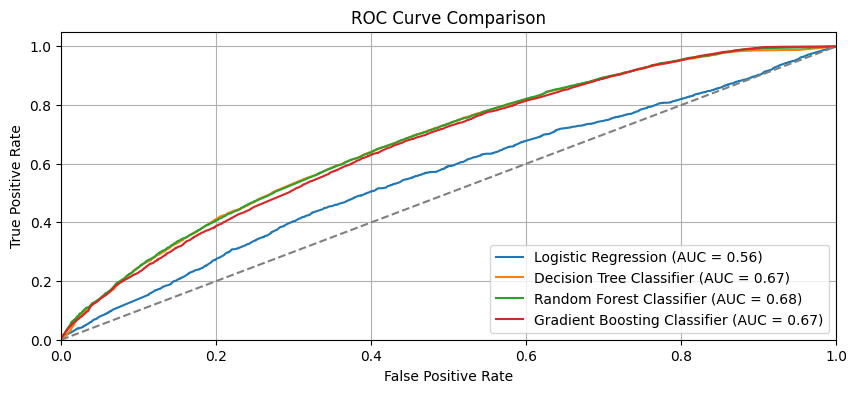

In [21]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve, auc

# Initialize the plot
plt.figure(figsize=(10, 4))

# Iterate over each model's predicted probabilities
for model_label, probabilities in predicted_probabilities.items():
    false_positive_rate, true_positive_rate, _ = roc_curve(y_test, probabilities)
    auc_score = auc(false_positive_rate, true_positive_rate)
    
    # Add ROC curve to the plot
    plt.plot(false_positive_rate, true_positive_rate, label=f'{model_label} (AUC = {auc_score:.2f})')

# Customize plot appearance
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')  # Reference diagonal
plt.xlim([0, 1])
plt.ylim([0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve Comparison')
plt.legend(loc='lower right')
plt.grid(True)
plt.show()

### Robustness Testing (Adversarial Testing)

- The following code simulates edge cases by modifying the input features to test model performance:


In [22]:
import numpy as np

# Generate adversarial examples by adding noise to test data
adversarial_X_test = X_test.copy()
noise = np.random.normal(0, 0.1, adversarial_X_test.shape)  # Small random noise
adversarial_X_test += noise

# Evaluate models on adversarial examples
adversarial_metrics = {}

for model_name, trained_pipeline in grid_search_pipelines.items():
    adversarial_preds = trained_pipeline.predict(adversarial_X_test)
    adversarial_probs = trained_pipeline.predict_proba(adversarial_X_test)[:, 1]
    
    # Store performance metrics on adversarial data
    adversarial_metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, adversarial_preds),
        'Precision': precision_score(y_test, adversarial_preds),
        'Recall': recall_score(y_test, adversarial_preds),
        'F1 Score': f1_score(y_test, adversarial_preds),
        'ROC AUC': roc_auc_score(y_test, adversarial_probs)
    }

# Convert adversarial metrics into a DataFrame for better visualization
adversarial_metrics_df = pd.DataFrame(adversarial_metrics).transpose()
print("Adversarial Testing Metrics:")
print(adversarial_metrics_df)


Adversarial Testing Metrics:
                              Accuracy  Precision    Recall  F1 Score  \
Logistic Regression           0.517780   0.545417  0.519988  0.532399   
Decision Tree Classifier      0.502435   0.538864  0.398869  0.458416   
Random Forest Classifier      0.531867   0.586646  0.383494  0.463799   
Gradient Boosting Classifier  0.482849   0.559953  0.095427  0.163065   

                               ROC AUC  
Logistic Regression           0.527191  
Decision Tree Classifier      0.513702  
Random Forest Classifier      0.570041  
Gradient Boosting Classifier  0.526175  


### Stability Analysis
- This code introduces slight perturbations in individual features to analyze the stability of predictions:

In [23]:
# Function to perturb features
def perturb_features(X, perturbation_level=0.01):
    perturbed_X = X.copy()
    for col in perturbed_X.columns:
        perturbation = np.random.uniform(-perturbation_level, perturbation_level, size=perturbed_X[col].shape)
        perturbed_X[col] += perturbation
    return perturbed_X

# Generate perturbed test data
perturbed_X_test = perturb_features(X_test, perturbation_level=0.01)

# Evaluate models on perturbed data
stability_metrics = {}

for model_name, trained_pipeline in grid_search_pipelines.items():
    stability_preds = trained_pipeline.predict(perturbed_X_test)
    stability_probs = trained_pipeline.predict_proba(perturbed_X_test)[:, 1]
    
    # Calculate metrics for stability analysis
    stability_metrics[model_name] = {
        'Accuracy': accuracy_score(y_test, stability_preds),
        'Precision': precision_score(y_test, stability_preds),
        'Recall': recall_score(y_test, stability_preds),
        'F1 Score': f1_score(y_test, stability_preds),
        'ROC AUC': roc_auc_score(y_test, stability_probs)
    }

# Convert stability metrics into a DataFrame
stability_metrics_df = pd.DataFrame(stability_metrics).transpose()
print("Stability Testing Metrics:")
print(stability_metrics_df)

Stability Testing Metrics:
                              Accuracy  Precision    Recall  F1 Score  \
Logistic Regression           0.549516   0.569469  0.601329  0.584966   
Decision Tree Classifier      0.541346   0.580740  0.471977  0.520740   
Random Forest Classifier      0.593297   0.614797  0.614919  0.614858   
Gradient Boosting Classifier  0.534904   0.606990  0.337665  0.433935   

                               ROC AUC  
Logistic Regression           0.556837  
Decision Tree Classifier      0.560344  
Random Forest Classifier      0.634641  
Gradient Boosting Classifier  0.585331  
